In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/gender_allsubject/male/student_scores_clean.csv')

In [2]:
behavior_cols = ['part_time_job', 'absence_days', 'extracurricular_activities', 'weekly_self_study_hours']

career_cols = [col for col in df.columns if 'career_' in col]

df

,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_Accountant,career_Artist,career_Banker,career_Business Owner,career_Construction Engineer,career_Designer,...,career_Game Developer,career_Government Officer,career_Lawyer,career_Real Estate Developer,career_Scientist,career_Software Engineer,career_Stock Investor,career_Unknown,career_Writer,average_score
0,0,3,0,27,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,82.000000
1,0,5,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,74.428571
2,0,3,1,23,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,84.714286
3,1,2,1,34,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,82.000000
4,0,6,0,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,81.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,0,2,1,12,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,84.571429
937,0,3,0,46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,92.142857
938,0,1,0,19,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76.428571
939,0,2,0,30,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,79.714286


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[behavior_cols + career_cols]

y = df['average_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# XGBoost

In [4]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', random_state=42)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [5]:
y_pred = model.predict(X_test)

accuracy = np.mean((np.abs(y_pred - y_test)) <= 5)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'accuracy: {accuracy:.2f}')
print(f'MSE: {mse:.2f}')
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f'R-squared: {r2:.2f}')


accuracy: 0.74
MSE: 24.05
RMSE: 4.90
MAE: 3.83
R-squared: 0.18


career_Government Officer: 0.0064
career_Game Developer: 0.0075
career_Artist: 0.0076
career_Banker: 0.0088
part_time_job: 0.0102
extracurricular_activities: 0.0126
absence_days: 0.0141
career_Stock Investor: 0.0142
career_Writer: 0.0168
career_Software Engineer: 0.0205
career_Construction Engineer: 0.0217
career_Real Estate Developer: 0.0232
career_Scientist: 0.0270
career_Designer: 0.0293
career_Lawyer: 0.0340
weekly_self_study_hours: 0.0397
career_Unknown: 0.0401
career_Accountant: 0.0538
career_Doctor: 0.1383
career_Business Owner: 0.4741


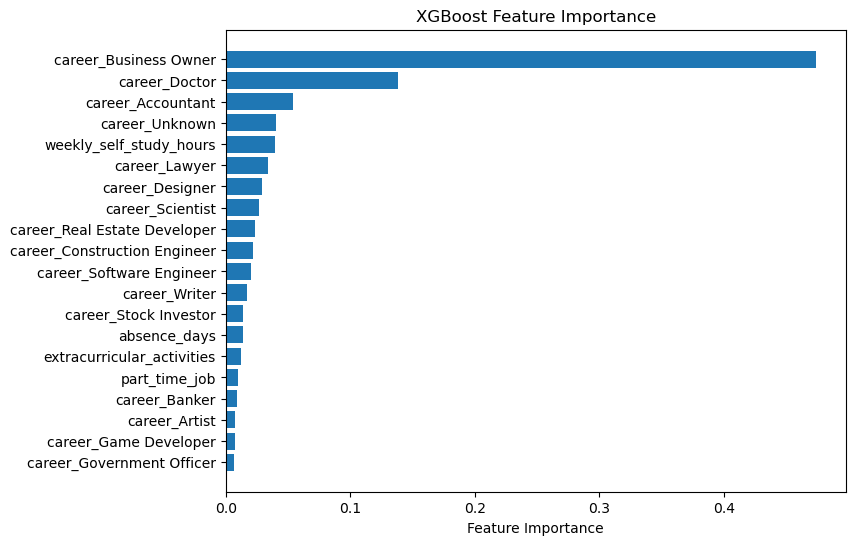

In [6]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X_train.columns

xgb_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
xgb_df = xgb_df.sort_values(by='importance', ascending=True)

for _, row in xgb_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

plt.figure(figsize=(8, 6))
plt.barh(xgb_df['feature'], xgb_df['importance'])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()


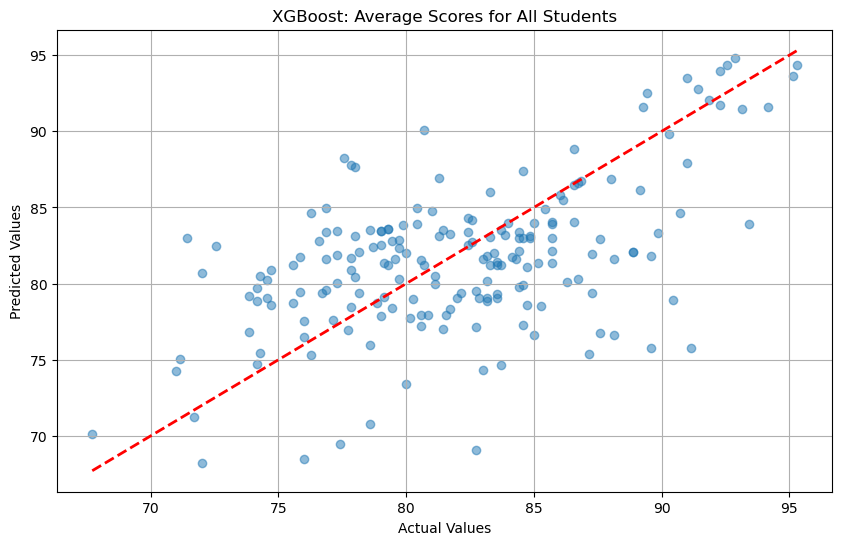

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'XGBoost: Average Scores for All Students')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
y_pred = model.predict(X_test)

accuracy = np.mean((np.abs(y_pred - y_test)) <= 5)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'accuracy: {accuracy:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

accuracy: 0.75
MSE: 20.92
RMSE: 4.57
MAE: 3.70
R-squared: 0.29


career_Game Developer: 0.0035
career_Writer: 0.0045
career_Artist: 0.0047
career_Government Officer: 0.0048
career_Scientist: 0.0051
career_Real Estate Developer: 0.0073
career_Banker: 0.0076
career_Construction Engineer: 0.0093
career_Designer: 0.0099
career_Lawyer: 0.0100
career_Software Engineer: 0.0104
career_Stock Investor: 0.0116
career_Accountant: 0.0154
career_Unknown: 0.0220
part_time_job: 0.0237
extracurricular_activities: 0.0328
career_Doctor: 0.0332
career_Business Owner: 0.1189
absence_days: 0.1598
weekly_self_study_hours: 0.5056


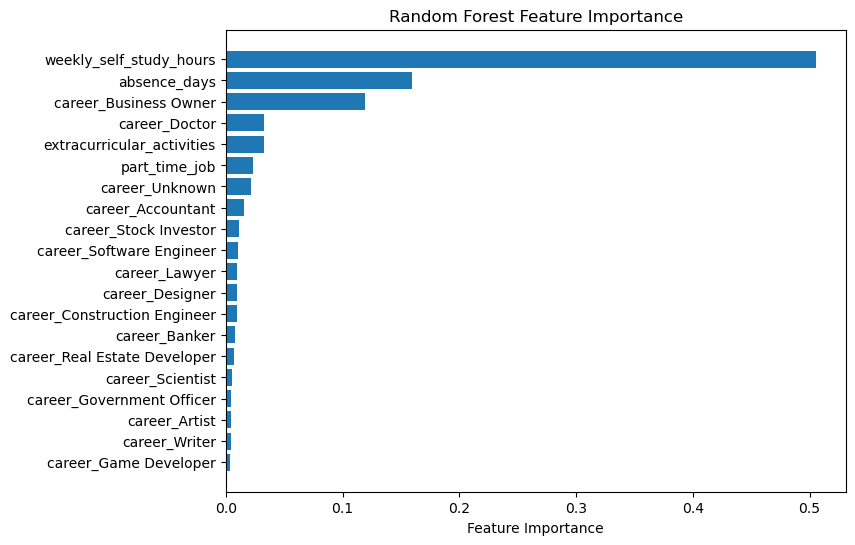

In [10]:
importances = model.feature_importances_
feature_names = X_train.columns

rf_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
rf_df = rf_df.sort_values(by='importance', ascending=True)

for _, row in rf_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

plt.figure(figsize=(8, 6))
plt.barh(rf_df['feature'], rf_df['importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


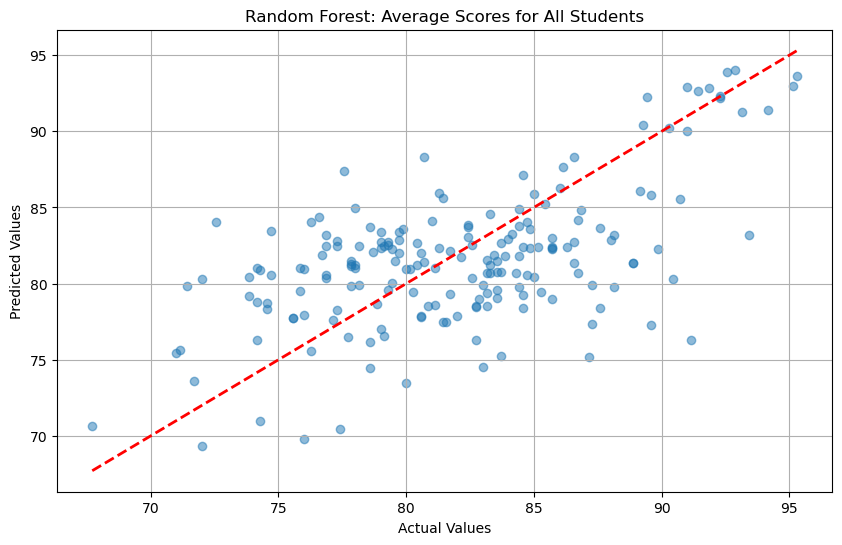

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Random Forest: Average Scores for All Students')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

accuracy = np.mean((np.abs(y_pred - y_test)) <= 5)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'accuracy: {accuracy:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

accuracy: 0.75
MSE: 21.32
RMSE: 4.62
MAE: 3.73
R-squared: 0.27


career_Business Owner: -3.5195
career_Accountant: -2.7547
career_Unknown: -2.1805
career_Real Estate Developer: -1.3035
career_Software Engineer: -0.9180
part_time_job: -0.9045
career_Writer: -0.5854
career_Stock Investor: -0.2612
career_Banker: -0.1910
absence_days: -0.1634
extracurricular_activities: -0.1608
weekly_self_study_hours: 0.1377
career_Artist: 0.2721
career_Government Officer: 0.4303
career_Game Developer: 0.6480
career_Lawyer: 0.9078
career_Scientist: 1.0797
career_Designer: 1.1420
career_Construction Engineer: 1.3012
career_Doctor: 5.9327


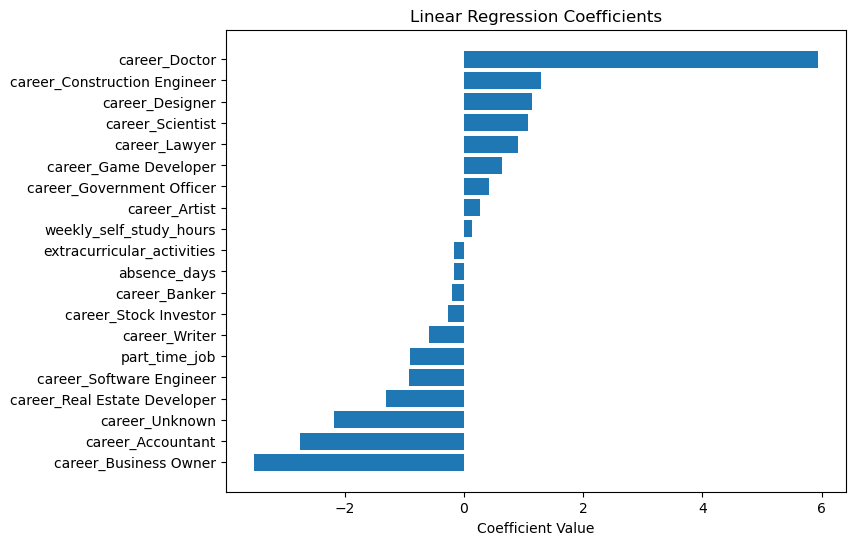

In [14]:
coefficients = model.coef_
feature_names = X_train.columns

lr_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
lr_df = lr_df.sort_values(by='coefficient', ascending=True)

for _, row in lr_df.iterrows():
    print(f"{row['feature']}: {row['coefficient']:.4f}")

plt.figure(figsize=(8, 6))
plt.barh(lr_df['feature'], lr_df['coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Linear Regression Coefficients")
plt.show()
